In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/butterfly-image-classification/Training_set.csv
/kaggle/input/butterfly-image-classification/Testing_set.csv
/kaggle/input/butterfly-image-classification/test/Image_747.jpg
/kaggle/input/butterfly-image-classification/test/Image_561.jpg
/kaggle/input/butterfly-image-classification/test/Image_345.jpg
/kaggle/input/butterfly-image-classification/test/Image_2566.jpg
/kaggle/input/butterfly-image-classification/test/Image_1593.jpg
/kaggle/input/butterfly-image-classification/test/Image_844.jpg
/kaggle/input/butterfly-image-classification/test/Image_1975.jpg
/kaggle/input/butterfly-image-classification/test/Image_270.jpg
/kaggle/input/butterfly-image-classification/test/Image_526.jpg
/kaggle/input/butterfly-image-classification/test/Image_968.jpg
/kaggle/input/butterfly-image-classification/test/Image_2104.jpg
/kaggle/input/butterfly-image-classification/test/Image_1769.jpg
/kaggle/input/butterfly-image-classification/test/Image_2008.jpg
/kaggle/input/butterfly-image-classific

In [40]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
from PIL import Image
import IPython.display

In [41]:
pwd

'/kaggle/working'

In [42]:
dir_path='../input/butterfly-image-classification/'

nsample = pd.DataFrame()
data_stats = pd.DataFrame()
paths=dict()


for dataset in ['train','test']:
    path = os.path.join(dir_path, dataset)
    path = os.path.join(path, dataset)
    paths[dataset]=path
#     labels = os.listdir(path)
    

In [43]:
paths

{'train': '../input/butterfly-image-classification/train/train',
 'test': '../input/butterfly-image-classification/test/test'}

In [44]:
dir_path + 'Training_set.csv'

'../input/butterfly-image-classification/Training_set.csv'

In [45]:
df_train = pd.read_csv(dir_path + 'Training_set.csv')
df_test = pd.read_csv(dir_path + 'Testing_set.csv')

In [46]:
df_train.sample(3)

,filename,label
2841,Image_2842.jpg,PURPLE HAIRSTREAK
1645,Image_1646.jpg,AFRICAN GIANT SWALLOWTAIL
385,Image_386.jpg,ORANGE OAKLEAF


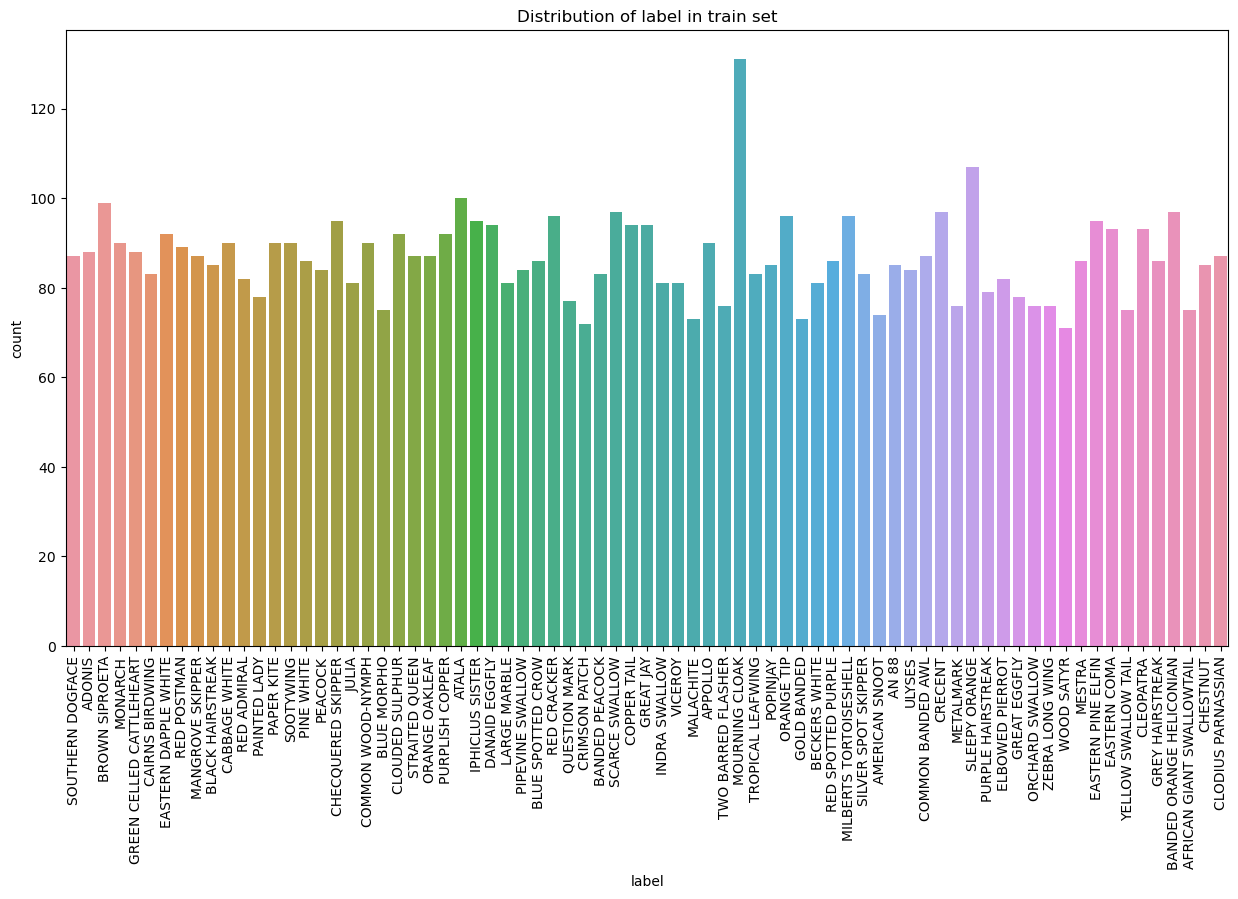

In [47]:
plt.rcParams["figure.figsize"] = (15, 8)
sns.countplot(df_train,x='label').set_title('Distribution of label in train set');
plt.xticks(rotation=90);

In [48]:
df_train

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


In [49]:
class_name = list(set(df_train.label.values.tolist()))
len(class_name)

75

In [50]:
def random_training_sample():
    train_folder = '../input/butterfly-image-classification/train/'# finds a random file in the training set, returns the file path and label
    files = os.listdir(train_folder) # list all files in the folder
    random_file = random.choice(files) # random choice of a file
    random_file_path = os.path.join(train_folder, random_file) # create the full path to that file
    return random_file_path

In [51]:
import PIL
import random

In [52]:
def display(file, df_train): # need the df_train to find the label
    file_nb = file.split('/')
    im = PIL.Image.open(file)
    print("Image size : ", im.size)
    label = df_train.label[df_train.filename == file_nb[-1]]
    print("label : ", label)
    return IPython.display.Image(file)

Image size :  (224, 224)
label :  2873    ORANGE OAKLEAF
Name: label, dtype: object


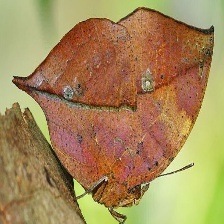

In [53]:
sample = random_training_sample()
display(plouf, df_train)

In [54]:
features = []
labels = []
image_size = (150, 150)

train_folder = '../input/butterfly-image-classification/train/'

for image in tqdm(os.listdir(train_folder), desc="Preprocess Image") :
    label_name = df_train.loc[df_train['filename'] == image, 'label'].values[0]    
    label = class_name.index(label_name)
    image_read = cv2.imread(os.path.join(train_folder, image))
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    features.append(image_normalized)
    labels.append(label)

Preprocess Image: 100%|██████████| 6499/6499 [00:27<00:00, 240.00it/s]


In [55]:
features[0].shape

(150, 150, 3)

In [56]:
len(labels), labels[0]

(6499, 57)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, shuffle=True, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, random_state=42)

In [59]:
len(X_train)

4549

In [60]:
X_train[0].shape

(150, 150, 3)

In [61]:
from tensorflow.keras.applications.resnet50 import ResNet50


model_res = ResNet50(weights='imagenet')

In [62]:
conv_base = ResNet50(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

print(conv_base.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [63]:
from keras.models import Sequential
from keras import models, regularizers, layers, optimizers, losses, metrics, callbacks

In [64]:
model_ella = models.Sequential()
model_ella.add(conv_base)
model_ella.add(layers.Flatten())
model_ella.add(layers.Dropout(0.5))
model_ella.add(layers.Dense(64, activation='relu'))
model_ella.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model_ella.add(layers.Dropout(0.5))
model_ella.add(layers.Dense(75, activation='softmax'))

In [65]:
for layer in conv_base.layers[:]:
   layer.trainable = False

print('conv_base is now NOT trainable')

conv_base is now NOT trainable


In [66]:
# Compile frozen conv_base + my top layer

model_ella.compile(optimizer=optimizers.Adam(),
              loss='CategoricalCrossEntropy',
              metrics=['accuracy'])

print("model compiled")
print(model_ella.summary())

model compiled
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_2 (Dropout)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                3276864   
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 75)

In [68]:
import tensorflow as tf

In [69]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [71]:
def print_save(model, history, name, save=True, plot=True):
    model.save(name)

    hist_df = pd.DataFrame(history.history)
    
    if save:
        hist_csv_file = name+'_history.csv'
        with open(hist_csv_file, mode='w') as f:
            hist_df.to_csv(f)
    if plot:
        hist_df[["loss",'val_loss']].plot()
        hist_df[["accuracy",'val_accuracy']].plot()
        
# print_save(model, history, 'simple_model',save=False)

In [ ]:
epoques = 10
batch_size = 32

#input to np.array
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_test)



history = model_ella.fit(x=X_train_np, y=y_train_np, epochs=epoques, batch_size=batch_size, verbose='1', callbacks=callback, validation_data=(X_test_np, y_train_np))